In [1]:
### Lets build the model
## Load the data
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')



In [23]:
tss = pd.read_csv("train.csv")
tss["Date"] = pd.to_datetime(tss["Date"])
tss.index = tss["Date"]
# tss = tss[["Weekly_Sales"]]
print(tss.shape)
tss.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
Date,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False
2010-02-12,1,1,2010-02-12,46039.49,True
2010-02-19,1,1,2010-02-19,41595.55,False
2010-02-26,1,1,2010-02-26,19403.54,False
2010-03-05,1,1,2010-03-05,21827.90,False


In [24]:
## Using month as a feature
tss['month'] = [tss.index[i].month for i in range(len(tss))]
## From the insights in session-1 
#There is a large jump in sales in January each year.
tss["Jan"] = tss["month"].apply(lambda x: 1 if x == 1 else 0)

# From box-plot shown session-1
tss["Dec"] = tss["month"].apply(lambda x: 1 if x == 12 else 0)
tss["Feb"] = tss["month"].apply(lambda x: 1 if x == 2 else 0)
tss["June"] = tss["month"].apply(lambda x: 1 if x == 6 else 0)

## Using lag-1 variable - From Auto-Correlation Plot.
tss["lag1"] = tss.Weekly_Sales.shift(1) 

## Using the trend
tss["Trend"] = [i for i in range(len(tss))]
tss = tss.fillna(0)
tss.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,Jan,Dec,Feb,June,lag1,Trend
Date,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,2,0,0,1,0,0.00,0
2010-02-12,1,1,2010-02-12,46039.49,True,2,0,0,1,0,24924.50,1
2010-02-19,1,1,2010-02-19,41595.55,False,2,0,0,1,0,46039.49,2
2010-02-26,1,1,2010-02-26,19403.54,False,2,0,0,1,0,41595.55,3
2010-03-05,1,1,2010-03-05,21827.90,False,3,0,0,0,0,19403.54,4


In [25]:
## Split the data into train and test
x_train = tss[tss.index <datetime.datetime(2012, 5, 1, 0, 0, 0)]
x_test = tss[tss.index >=datetime.datetime(2012, 5, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(344667, 12) (76903, 12)


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train[["Jan", "Feb", "June", "Dec", "lag1", "Trend","Store","Dept"]], x_train.Weekly_Sales)
pred = model.predict(x_test[["Jan", "Feb", "June", "Dec", "lag1",  "Trend","Store","Dept"]])
measure = math.pow(mean_squared_error(x_test.Weekly_Sales, pred), 0.5)
print("RMSE:", measure)

RMSE: 3629.8695632406625


In [36]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor().fit(x_train[["Jan", "Feb", "June", "Dec", "lag1", "Trend","Store","Dept"]], x_train.Weekly_Sales)
pred = model.predict(x_test[["Jan", "Feb", "June", "Dec", "lag1",  "Trend", "Store","Dept"]])
measure = math.pow(mean_squared_error(x_test.Weekly_Sales,  pred), 0.5)
print("RMSE:", measure)

RMSE: 6458.274001739882


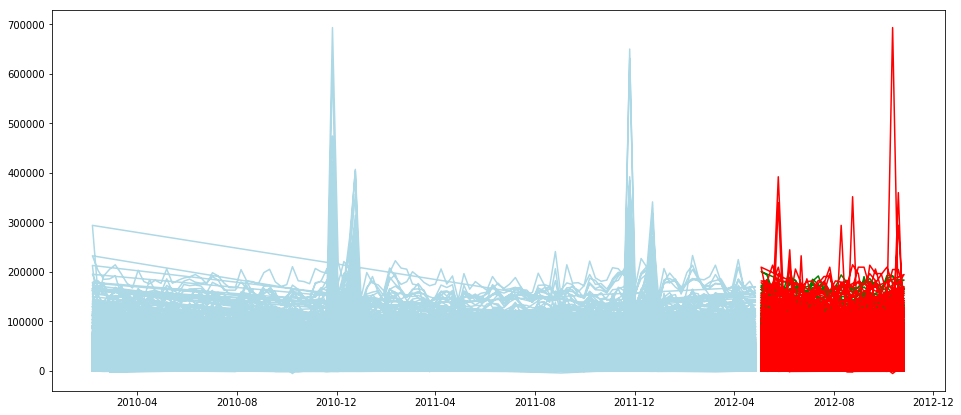

In [33]:
pred = pd.DataFrame(pred)
pred.columns = ["yhat"]
pred.index = x_test.index
pred.head()

plt.figure(figsize=(16, 7))
plt.plot(x_train.index,  x_train.Weekly_Sales, color="lightblue")
plt.plot(x_test.index, x_test.Weekly_Sales, color="green")
plt.plot(pred.index, pred, color="red")
plt.show()

,yhat
Date,
2012-05-04,15784.60
2012-05-11,15136.78
2012-05-18,19610.25
2012-05-25,17859.30
2012-06-01,18244.55
2012-06-08,21331.51
2012-06-15,17150.84
2012-06-22,16637.62
2012-06-29,16565.09
